## Model simuleren: Krachtenbalans

$$\frac{dx1}{dt}= x2$$

$$\frac{dx2}{dt}= -\frac{b}{m}x2 -\frac{k}{m}x1 + Fex$$

In [1]:
%matplotlib inline

In [13]:
# Importeren van functionaliteiten
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import math
from IPython.display import Image
from ipywidgets import interact, fixed, FloatRangeSlider
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
import os
sys.path.append("functions")
%aimport general_functions
%aimport force

In [6]:
functie_afgeleiden = force.model_afgeleiden

## Model simuleren

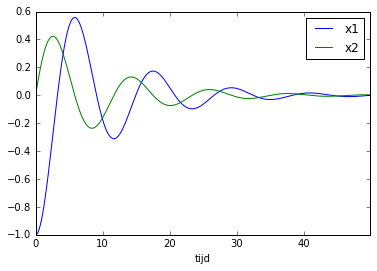

In [8]:
df, _ = general_functions.model(
    np.arange(0, 50, 0.1), # tijdstappen
    [-1, 0], # initiële condities
    ['x1','x2'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    returnDataFrame=True, plotresults=True,
    # vanaf hier: functie specifieke parameters
    b=0.2, m=1, k=0.3, Fex=0.)

$$\frac{dx1}{dt}= x2$$

$$\frac{dx2}{dt}= -\frac{b}{m}x2 -\frac{k}{m}x1 + Fex$$

## Impact initiële conditie en input

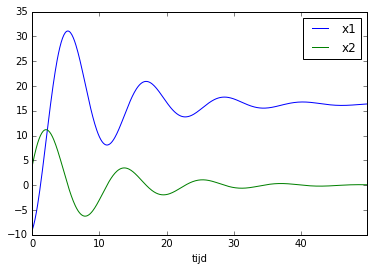

In [20]:
interact(general_functions.model,
         tijdstappen=fixed(np.arange(0., 50, 0.1)),
         init=FloatRangeSlider(value=(-5, 2), min=-10, max=10, step=1, description='initial position'),
         varnames=fixed(['x1','x2']),
         f=fixed(functie_afgeleiden),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         b=fixed(0.2), m=fixed(1), k=fixed(0.3), Fex=(0,10,0.1))

$$\frac{dx1}{dt}= x2$$

$$\frac{dx2}{dt}= -\frac{b}{m}x2 -\frac{k}{m}x1 + Fex$$

## Impact parameters

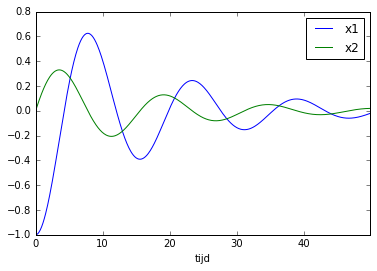

In [21]:
interact(general_functions.model,
         tijdstappen=fixed(np.arange(0., 50, 0.1)),
         init=fixed([-1, 0]), varnames=fixed(['x1','x2']),
         f=fixed(functie_afgeleiden),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         b=(0., 0.5, 0.01), m=(0. ,5. ,0.1), k=(0., 1., 0.1), Fex=fixed(0))

$$\frac{dx1}{dt}= x2$$

$$\frac{dx2}{dt}= -\frac{b}{m}x2 -\frac{k}{m}x1 + Fex$$

# sensitiviteit

In [24]:
df_sens = general_functions.sensitiviteit(
    np.arange(0, 50, 0.1), # tijdstappen
    [-1, 0], # initiële condities
    ['x1','x2'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    parameternaam='m',
    # vanaf hier: functie specifieke parameters
    b=0.2, m=1, k=0.3, Fex=0.)

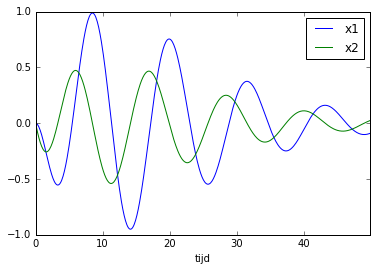

In [25]:
df_sens.plot()